<a href="https://colab.research.google.com/github/wendywqz/Pandas_Series_exercises/blob/main/Pandas_DataFrame_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)

2.1.4
1.26.4


# ***DataFrame Creation***

In [3]:
pd.DataFrame(data=[None],
             index=[None],
             columns=[None])
#Create an empty pandas DataFrame

,None
None,None


In [4]:
marvel_data = [
    ['Spider-Man', 'male', 1962],
    ['Captain America', 'male', 1941],
    ['Wolverine', 'male', 1974],
    ['Iron Man', 'male', 1963],
    ['Thor', 'male', 1963],
    ['Thing', 'male', 1961],
    ['Mister Fantastic', 'male', 1961],
    ['Hulk', 'male', 1962],
    ['Beast', 'male', 1963],
    ['Invisible Woman', 'female', 1961],
    ['Storm', 'female', 1975],
    ['Namor', 'male', 1939],
    ['Hawkeye', 'male', 1964],
    ['Daredevil', 'male', 1964],
    ['Doctor Strange', 'male', 1963],
    ['Hank Pym', 'male', 1962],
    ['Scarlet Witch', 'female', 1964],
    ['Wasp', 'female', 1963],
    ['Black Widow', 'female', 1964],
    ['Vision', 'male', 1968]
]
marvel_df = pd.DataFrame(data = marvel_data)
marvel_df
#marvel_df2 = pd.DataFrame(marvel_data)
#marvel_df2

#Create a marvel_df pandas DataFrame → pd.DataFrame() function with the marvel_data

,0,1,2
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [5]:
col_names =['name', 'sex', 'first_appearance'] #col_names stores the name string value of the columns.

marvel_df.columns = col_names # marvel_df.columns can rename the columns.
marvel_df

# Add column names to the marvel_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [ ]:
marvel_df = marvel_df.drop(columns=['name'])
#marvel_df = marvel_df.drop(['name'], axis=1)
marvel_df

# Drop the name column as it's now the index

,sex,first_appearance
0,male,1962
1,male,1941
2,male,1974
3,male,1963
4,male,1963
5,male,1961
6,male,1961
7,male,1962
8,male,1963
9,female,1961


In [6]:
"""# Reset the index to bring the 'name' column back into the DataFrame as a regular column
marvel_df = marvel_df.reset_index()

# Now you can drop the rows by the 'name' column
marvel_df = marvel_df.drop(marvel_df[marvel_df['name'].isin(['Namor', 'Hank Pym'])].index)

# Optionally, you can set the 'name' column back as the index if needed
# marvel_df = marvel_df.set_index('name')

marvel_df
# Drop the Namor and Hank Pym rows"""

# Error codes:
# marvel_df = marvel_df.drop(['Namor', 'Hank Pym'], axis=0)
# marvel_df

# Use the 'name' column to filter the rows to be dropped
marvel_df = marvel_df[~marvel_df['name'].isin(['Namor', 'Hank Pym'])]
marvel_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [ ]:
# Alternative code to 'drop' the row in a table, actually this method is to create a new DataFrame by filtering out the row where the "name" is "Thor" and then reassign this new DataFrame to the marvel_df variable.
marvel_df = marvel_df[marvel_df['name'] != 'Thor']
marvel_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961
10,Storm,female,1975


In [ ]:
# This approach first finds the index of the row containing 'Thing' and then uses the .drop() method to remove the row corresponding to that index.

# Find the index of the row where 'name' is 'Thing'
"thing_index = marvel_df[marvel_df['name'] == 'Thing'].index[0] "

# Drop the row using the index, and you will see the row index number is also deleted.
"marvel_df = marvel_df.drop(thing_index)"
marvel_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961
10,Storm,female,1975


# **DataFrame selection, slicing and indexation**

In [ ]:
# Show the first 5 elements on marvel_df
a= marvel_df.iloc[:5,]
b= marvel_df.iloc[:5]
c= marvel_df.head()
a

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
6,Mister Fantastic,male,1961


In [ ]:
# Show the last 5 elements on marvel_df
marvel_df.iloc[-5:,]
marvel_df.tail()

,name,sex,first_appearance
14,Doctor Strange,male,1963
16,Scarlet Witch,female,1964
17,Wasp,female,1963
18,Black Widow,female,1964
19,Vision,male,1968


In [ ]:
# Show just the sex of the first 5 elements on marvel_df
marvel_df.iloc[:5,1]
marvel_df['sex'].head()
marvel_df.iloc[:5,]['sex'].to_frame() # to_frame() is to show the data in a table form.
marvel_df.iloc[:5,].sex.to_frame()
marvel_df.head().name.to_frame() # a flaw

,sex
0,male
1,male
2,male
3,male
6,male


In [ ]:
# Show the first_appearance of all middle elements on marvel_df
marvel_df.iloc[1:-1,2].to_frame()
marvel_df.iloc[1:-1,].first_appearance.to_frame()

,first_appearance
1,1941
2,1974
3,1963
5,1961
6,1961
7,1962
8,1963
9,1961
10,1975
12,1964


In [ ]:
# Show the first and last elements on marvel_df

marvel_df.iloc[[0,-1],]
#marvel_df.iloc[[0,-1],][['sex','first_appearance']]

# Use the concat() function instead of append()
pd.concat([marvel_df.head(1), marvel_df.tail(1)])

,name,sex,first_appearance
0,Spider-Man,male,1962
19,Vision,male,1968


# **DataFrame manipulation and operations**

In [10]:
# Modify the first_appearance of 'Vision' to year 1964

marvel_df.loc[marvel_df['name'] == 'Vision', 'first_appearance'] = 1964
marvel_df.loc['Vision', 'first_appearance'] = 1964 # This code has flaws as shown in the console.
#
marvel_df['first_appearance'] = marvel_df['first_appearance'].astype(int)
marvel_df

<ipython-input-10-541b4b01fb3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_df.loc['Vision', 'first_appearance'] = 1964 # This code has flaws as shown in the console.


,name,sex,first_appearance,years_since
0,Spider-Man,male,1962,56.0
1,Captain America,male,1941,77.0
2,Wolverine,male,1974,44.0
3,Iron Man,male,1963,55.0
4,Thor,male,1963,55.0
5,Thing,male,1961,57.0
6,Mister Fantastic,male,1961,57.0
7,Hulk,male,1962,56.0
8,Beast,male,1963,55.0
9,Invisible Woman,female,1961,57.0


**1. marvel_df.loc[marvel_df['name'] == 'Vision', 'first_appearance'] = 1964**

Boolean Indexing: This code uses boolean indexing to filter the DataFrame. The expression marvel_df['name'] == 'Vision' creates a boolean mask (a Series of True/False values) where True corresponds to rows where the 'name' column equals 'Vision'.
Specific Row and Column Selection: The .loc indexer then uses this boolean mask to select the specific row(s) where the condition is met, and the column 'first_appearance' to pinpoint the exact cell to modify.
When to Use: This method is generally preferred when you want to modify values based on a condition applied to one or more columns.

**2. marvel_df.loc['Vision', 'first_appearance'] = 1964**

Label-Based Indexing: This code assumes that 'Vision' is a valid index label in your DataFrame. It directly uses the label 'Vision' to select the corresponding row.
Direct Cell Access: It then uses the column label 'first_appearance' to access the specific cell for modification.
When to Use: This method is suitable when your DataFrame's index contains meaningful labels (like names in this case) and you want to directly access a row by its label.
Key Points:

**Index vs. Column:**The first method works by filtering rows based on a column value, while the second method relies on the index labels.

**Flexibility:** The boolean indexing approach is more flexible as it allows you to apply complex conditions involving multiple columns.

**Efficiency:** If your DataFrame is very large, label-based indexing (the second method) can be slightly faster if the index is optimized.
In your case, if 'Vision' is indeed a valid index label, both methods should achieve the same result. However, the boolean indexing approach is generally more robust and applicable in a wider range of scenarios.

In [7]:
# Add a new column to marvel_df called 'years_since' with the years since first_appearance

marvel_df['years_since'] = 2018 - marvel_df['first_appearance']
marvel_df

<ipython-input-7-8ea534103120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_df['years_since'] = 2018 - marvel_df['first_appearance']


,name,sex,first_appearance,years_since
0,Spider-Man,male,1962,56
1,Captain America,male,1941,77
2,Wolverine,male,1974,44
3,Iron Man,male,1963,55
4,Thor,male,1963,55
5,Thing,male,1961,57
6,Mister Fantastic,male,1961,57
7,Hulk,male,1962,56
8,Beast,male,1963,55
9,Invisible Woman,female,1961,57


# **DataFrame boolean arrays (also called masks)**

In [12]:
# Given the marvel_df pandas DataFrame, make a mask showing the female characters.

mask = marvel_df['sex'] == 'female'
mask
# marvel_df[mask] # This code will show only the 'true' rows in the 'marvel_df' table.


,sex
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,True


In [13]:
# Given the marvel_df pandas DataFrame, get the characters with first_appearance after 1970.

mask = marvel_df['first_appearance'] > 1970
marvel_df[mask]

,name,sex,first_appearance,years_since
2,Wolverine,male,1974,44.0
10,Storm,female,1975,43.0


# **DataFrame summary statistics**

In [14]:
# Show basic statistics of marvel_df (show only the numeric column)

marvel_df.describe()

,first_appearance,years_since
count,19.000000,18.000000
mean,1962.947368,54.888889
std,6.536000,6.824600
min,1941.000000,43.000000
25%,1962.000000,54.000000
50%,1963.000000,55.000000
75%,1964.000000,56.000000
max,1975.000000,77.000000


In [19]:
# Given the marvel_df pandas DataFrame, show the mean value of first_appearance

marvel_df.first_appearance.mean() # Difference between marvel_df['first_appearance].mean()

1962.9473684210527

In [18]:
# Given the marvel_df pandas DataFrame, show the min value of first_appearance

np.min(marvel_df.first_appearance)
marvel_df.first_appearance.min()

1941.0

In [20]:
# Given the marvel_df pandas DataFrame, get the characters with the min value of first_appearance

mask = marvel_df['first_appearance'] == marvel_df.first_appearance.min()
marvel_df[mask]

,name,sex,first_appearance,years_since
1,Captain America,male,1941.0,77.0


# **DataFrame basic plottings**

In [15]:
# Reset index names of marvel_df

marvel_df = marvel_df.reset_index()
marvel_df

,index,name,sex,first_appearance,years_since
0,0,Spider-Man,male,1962,56.0
1,1,Captain America,male,1941,77.0
2,2,Wolverine,male,1974,44.0
3,3,Iron Man,male,1963,55.0
4,4,Thor,male,1963,55.0
5,5,Thing,male,1961,57.0
6,6,Mister Fantastic,male,1961,57.0
7,7,Hulk,male,1962,56.0
8,8,Beast,male,1963,55.0
9,9,Invisible Woman,female,1961,57.0


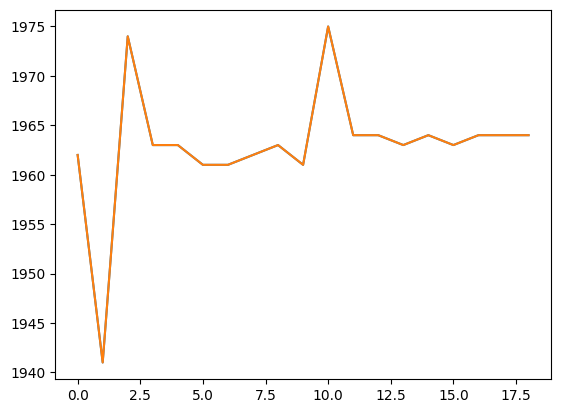

In [23]:
# Plot the values of first_appearance

marvel_df.first_appearance.plot()
plt.plot(marvel_df.index, marvel_df.first_appearance)

(array([ 1.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  2.]),
 array([1941. , 1944.4, 1947.8, 1951.2, 1954.6, 1958. , 1961.4, 1964.8,
        1968.2, 1971.6, 1975. ]),
 <BarContainer object of 10 artists>)

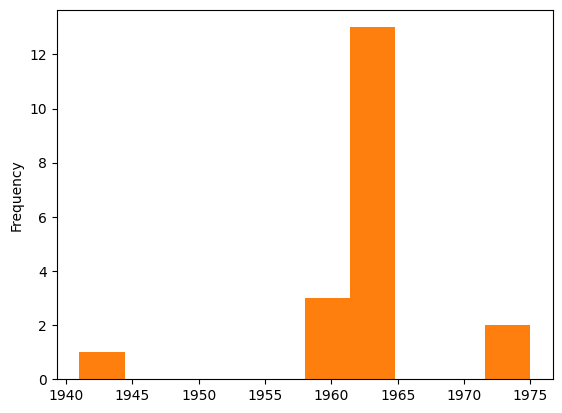

In [16]:
# Plot a histogram (plot.hist) with values of first_appearance
marvel_df['first_appearance'] = marvel_df['first_appearance'].astype(int)
marvel_df.first_appearance.plot.hist()
plt.hist(marvel_df.first_appearance)